In [1]:
def PathTree(G, i : int = 0):
    T = Graph()
    n = G.order()        
    visited = [0] * n
    
    def recursive_path(v : int, parent : int = -1):
        visited[v] = 1
        curr_vtx = T.order()
        T.add_vertex()
        
        if curr_vtx != 0:
            T.add_edge(curr_vtx, parent)
        
        for u in G.neighbor_iterator(v):
            if visited[u] == 0:
                recursive_path(u, curr_vtx)
                
        visited[v] = 0
    
    recursive_path(i)
    return T

In [2]:
min_size = 1
max_size = 6

list_of_graphs = []

for size in range(min_size, max_size + 1):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected() or G.is_tree():
            continue
        
        founded = []
        for i in range(G.order()):
            T = PathTree(G, i)
            
            if T.has_perfect_matching():
                if not G.has_perfect_matching():
                    print("GRAPH WHITOUT PERFECT MATCHING")

                
                already_found = False
                for T2 in founded:
                    if T.is_isomorphic(Graph(T2)):
                        already_found = True
                if already_found:
                    continue
                        
                # print(f"FOUND: vertex {i}")
                # G.plot().show()
                # T.plot().show()
                
                t = T.graph6_string()
                founded.append(T)
                list_of_graphs.append((G.graph6_string(), i, t))



Testing with size:  1

Testing with size:  2

Testing with size:  3

Testing with size:  4

Testing with size:  5

Testing with size:  6


In [3]:
list_of_graphs

[('CV', 1, 'EhOG'),
 ('ECRo', 1, 'GpC`?C'),
 ('ECRw', 2, 'IhOI?D??G'),
 ('ECr_', 0, 'IpCK?C@?_'),
 ('ECpo', 2, 'IhCI?C@?G'),
 ('ECqg', 0, 'IpGK?CA?G'),
 ('ECro', 2, 'MhGI?C@?I??@?@??_'),
 ('ECrg', 2, 'MhGI?C@?I??@?@?A?'),
 ('ECrw', 2, 'QhGI?C@?I??@?@??g???@??C??_'),
 ('ECZO', 1, 'GkCG_C'),
 ('ECZG', 2, 'IhCI?C@?_'),
 ('ECZW', 2, 'MhCG_D??G?_C?G??_'),
 ('EQjO', 0, 'IkE?GCC?G')]

In [62]:
for G, i, T in list_of_graphs:
    grid = graphics_array([[Graph(G).plot(), Graph(T).plot()]])
    file_path = f"./data/Pathtrees_with_perfect_matching/{G}.png"
    grid.save(file_path)

In [4]:
def inverse_of_tree(T):
    A = T.adjacency_matrix()
    G = Graph(A.inverse()) 
    return G

In [75]:
for G, i, T in list_of_graphs:
    G2 = inverse_of_tree(Graph(T))
    grid = graphics_array([[Graph(G).plot(), Graph(T).plot(), G2.plot()]])
    file_path = f"./data/Inverse_pathtree/{G}.png"
    grid.save(file_path, figsize=(10, 6))

## Theorem: If $T(G)$ is invertible, then $G$ has a unique perfect matching

In [29]:
min_size = 2
max_size = 8
step = 2

list_of_graphs = []

for size in range(min_size, max_size + 1, step):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected() or G.is_tree():
            continue
    
        cnt += 1
        if cnt % 1000 == 0:
            print(cnt, "of", 11094)
    
        matchings = 0
        for m in G.perfect_matchings():
            matchings += 1
            if matchings == 2:
                break
        
        if matchings != 1:
            continue        
        
        founded = []
        for i in range(G.order()):
            T = PathTree(G, i)
            
            if T.has_perfect_matching():
                already_found = False
                for T2 in founded:
                    if T.is_isomorphic(Graph(T2)):
                        already_found = True
                if already_found:
                    continue
                        
                # print(f"FOUND: vertex {i}")
                # G.plot().show()
                # T.plot().show()
                
                t = T.graph6_string()
                founded.append(T)
                list_of_graphs.append((G.graph6_string(), i, t))


Testing with size:  2

Testing with size:  4

Testing with size:  6

Testing with size:  8
1000 of 11094
2000 of 11094
3000 of 11094
4000 of 11094
5000 of 11094
6000 of 11094
7000 of 11094
8000 of 11094
9000 of 11094
10000 of 11094
11000 of 11094


In [47]:
with open('invertible_pathtrees.txt', 'w') as file:
    for item in list_of_graphs:
        file.write(','.join(map(str, item)) + '\n')

### A graph can have two non-isomorphic pathtrees that are invertible? - YES

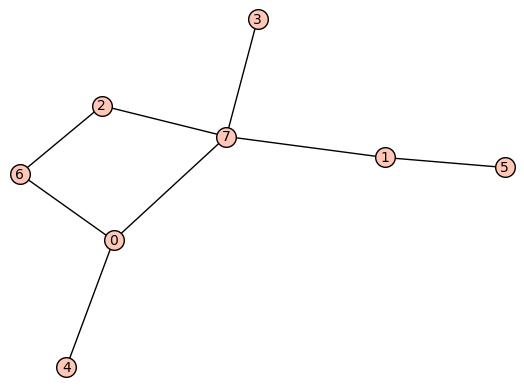

Vertex:  0


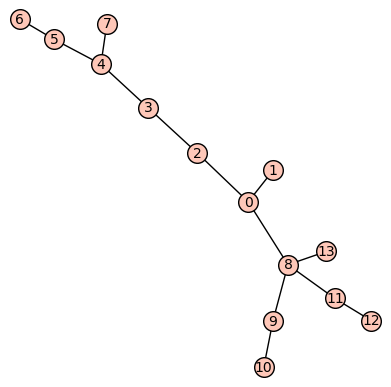

Vertex:  1


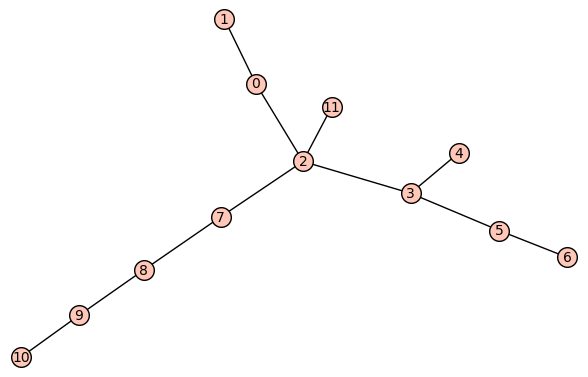

In [27]:
total_len = list_of_graphs
st = {}
for g, i, t in list_of_graphs:
    if g in st:
        G = Graph(g)
        G.plot().show()
        print("Vertex: ", st[g])
        PathTree(G, st[g]).plot().show()
        print("Vertex: ", i)
        PathTree(G, i).plot().show()
        break
        
    st[g] = i

## Every graph with a unique parfect matching have an invertible pathtree? - NO

In [31]:
min_size = 2
max_size = 8
step = 2

unique_pm_graphs = []

for size in range(min_size, max_size + 1, step):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected() or G.is_tree():
            continue
    
        cnt += 1
        if cnt % 1000 == 0:
            print(cnt, "of", 11094)
    
        matchings = 0
        for m in G.perfect_matchings():
            matchings += 1
            if matchings == 2:
                break
        
        if matchings == 1:
            unique_pm_graphs.append(G.graph6_string())


Testing with size:  2

Testing with size:  4

Testing with size:  6

Testing with size:  8
1000 of 11094
2000 of 11094
3000 of 11094
4000 of 11094
5000 of 11094
6000 of 11094
7000 of 11094
8000 of 11094
9000 of 11094
10000 of 11094
11000 of 11094


In [33]:
if len(unique_pm_graphs) == len(list_of_graphs):
    print("YES")
else:
    print("NO")

NO


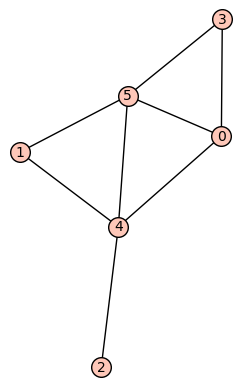

In [37]:
g_in_list = [g for g, i, t in list_of_graphs]

example = Graph()

for g in unique_pm_graphs:
    if g not in g_in_list:
        example = Graph(g)
        example.plot().show()
        break

In [48]:
for i in range(example.order()):
    T = PathTree(example, i)
    print(f"Vertex: {i}, size of tree: {T.order()}, matching: {T.matching(value_only=True)}")

Vertex: 0, size of tree: 25, matching: 10
Vertex: 1, size of tree: 26, matching: 12
Vertex: 2, size of tree: 21, matching: 10
Vertex: 3, size of tree: 28, matching: 11
Vertex: 4, size of tree: 21, matching: 10
Vertex: 5, size of tree: 21, matching: 9


## The graphs with invertible integral trees are inverses of some tree? - Not necessarily

In [55]:
g, i, t = list_of_graphs[0]
G = Graph(g)
A = G.adjacency_matrix()
A_inv = A.inverse()
print(A_inv)


[ 0 -1  1  0]
[-1  2 -1  1]
[ 1 -1  0  0]
[ 0  1  0  0]


## Graphs with unique perfect matching that does not have invertible integral trees

In [60]:
g_in_list = [g for g, i, t in list_of_graphs]

for g in unique_pm_graphs:
    if g in g_in_list:
        continue
    G = Graph(g)
    if G.order() <= 6:
        file_path = f"./data/Unique_perfect_matching/{g}.png"
        G.plot().save(file_path)

## Relating pathtrees by tree-operation

In [5]:
bucket = {}
for g, i, t in list_of_graphs:
    sz : int = len(t)
    if sz not in bucket.keys():
        bucket[sz] = []
    bucket[sz].append((g, i, t))

In [6]:
print(bucket)

{4: [('CV', 1, 'EhOG')], 6: [('ECRo', 1, 'GpC`?C'), ('ECZO', 1, 'GkCG_C')], 9: [('ECRw', 2, 'IhOI?D??G'), ('ECr_', 0, 'IpCK?C@?_'), ('ECpo', 2, 'IhCI?C@?G'), ('ECqg', 0, 'IpGK?CA?G'), ('ECZG', 2, 'IhCI?C@?_'), ('EQjO', 0, 'IkE?GCC?G')], 17: [('ECro', 2, 'MhGI?C@?I??@?@??_'), ('ECrg', 2, 'MhGI?C@?I??@?@?A?'), ('ECZW', 2, 'MhCG_D??G?_C?G??_')], 27: [('ECrw', 2, 'QhGI?C@?I??@?@??g???@??C??_')]}


In [7]:
inverses = []
for g, i, t in bucket[6]:
    # Graph(g).plot().show()
    # Graph(t).plot().show()
    T_inv = inverse_of_tree(Graph(t))
    inverses.append(T_inv)

SUBGRAPH: 


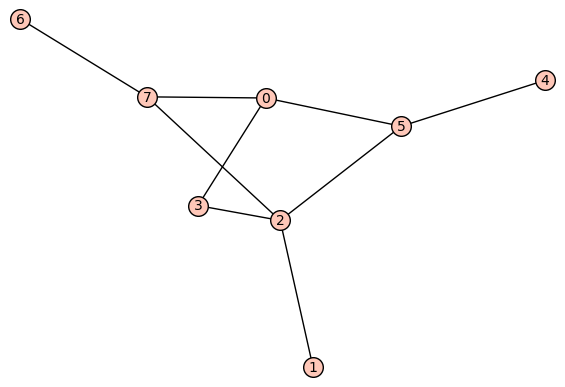

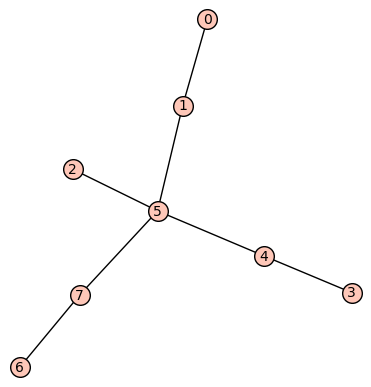

In [8]:
for t in inverses:
    for t2 in inverses:
        if t == t2:
            continue
        if t.subgraph_search_count(t2) != 0:
            print("SUBGRAPH: ")
            t.plot().show()
            t2.plot().show()

In [9]:
buck = bucket[6]

G1 = Graph(buck[0][0])
G2 = Graph(buck[1][0])
T1 = Graph(buck[0][2])
T2 = Graph(buck[1][2])
T1_inv = inverse_of_tree(T1)
T2_inv = inverse_of_tree(T2)

#### Inverse(T1) is contained in Inverse(T2), therefore, Lambda(Inverse(T1)) < Lambda(Inverse(T2))

In [10]:
print(T1_inv.charpoly().real_roots())
print(T2_inv.charpoly().real_roots())

[-2.18890105931673, -1.00000000000000, -0.456850251747857, 0.456850251747857, 1.00000000000000, 2.18890105931673]
[-2.68033768939628, -1.00000000000000, -0.756816387745452, -0.492969396658397, 0.492969396658397, 0.756816387745452, 1.00000000000000, 2.68033768939628]


#### This implies that Lambda_mid(T1) > Lambda_mid(T2)

In [11]:
print(T1.charpoly().real_roots())
print(T2.charpoly().real_roots())

[-2.18890105931673, -1.00000000000000, -0.456850251747857, 0.456850251747857, 1.00000000000000, 2.18890105931673]
[-2.02852348802688, -1.32132445358245, -1.00000000000000, -0.373087318048063, 0.373087318048063, 1.00000000000000, 1.32132445358245, 2.02852348802688]


### Question Is Mu_mid(G1) > Mu_mid(G2)?

In [12]:
print(G1.matching_polynomial().real_roots())
print(G2.matching_polynomial().real_roots())

[-2.18890105931673, -1.00000000000000, -0.456850251747857, 0.456850251747857, 1.00000000000000, 2.18890105931673]
[-2.02852348802688, -1.32132445358245, -0.373087318048063, 0.373087318048063, 1.32132445358245, 2.02852348802688]


#### Check for more cases:

In [13]:
subgraphs = {}

for g, i, t in bucket[9]:
    T1_inv = inverse_of_tree(Graph(t))
    subgraphs[(g, i, t)] = []
    for g2, i2, t2 in bucket[9]:
        if g == g2:
            continue
        
        T2_inv = inverse_of_tree(Graph(t2))
        if T1_inv.subgraph_search_count(T2_inv) != 0:
            subgraphs[(g, i, t)].append((g2, i2, t2))

GRAPH:  ECRw


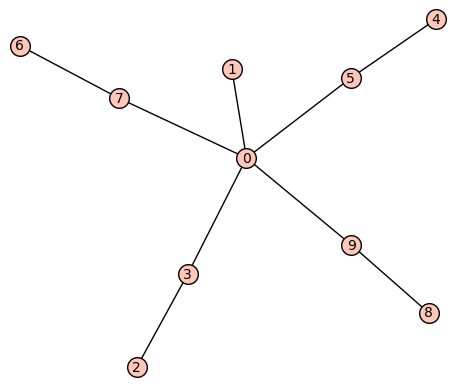

SUBGRAPHS:
GRAPH:  ECr_


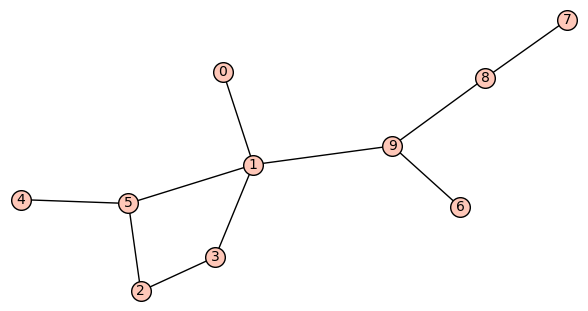

SUBGRAPHS:
ECqg


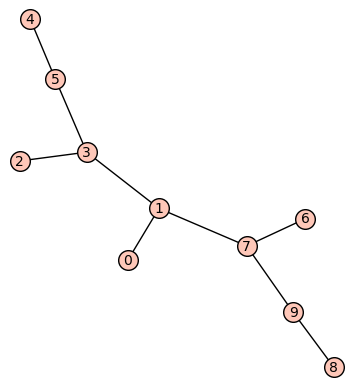

ECZG


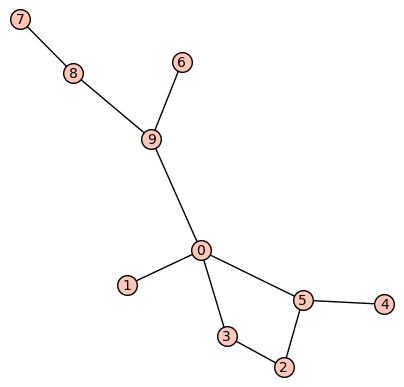

GRAPH:  ECpo


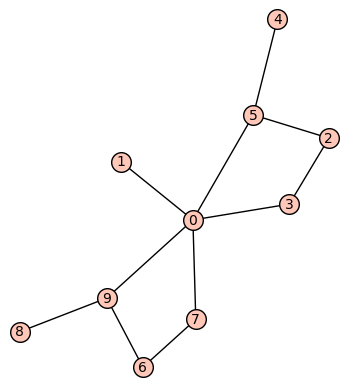

SUBGRAPHS:
ECRw


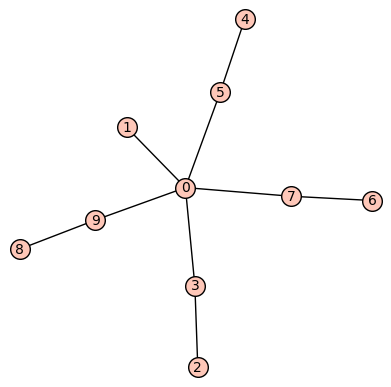

ECr_


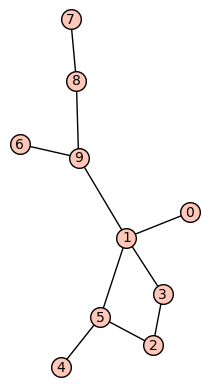

ECqg


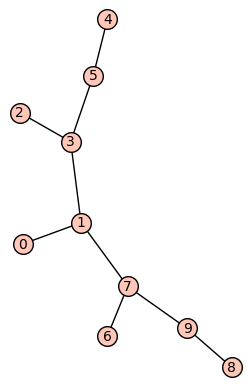

ECZG


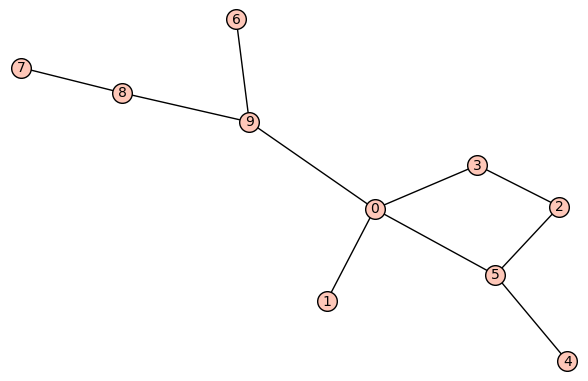

GRAPH:  ECqg


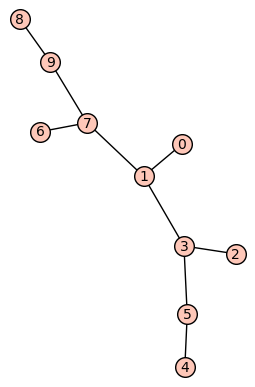

SUBGRAPHS:
GRAPH:  ECZG


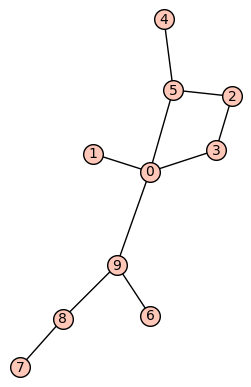

SUBGRAPHS:
ECr_


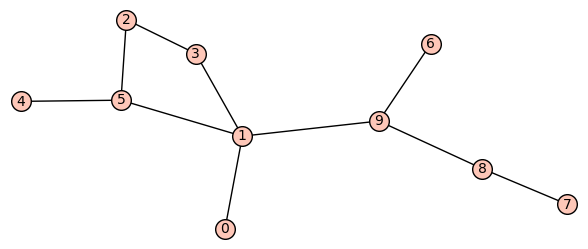

ECqg


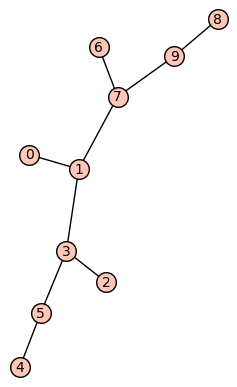

GRAPH:  EQjO


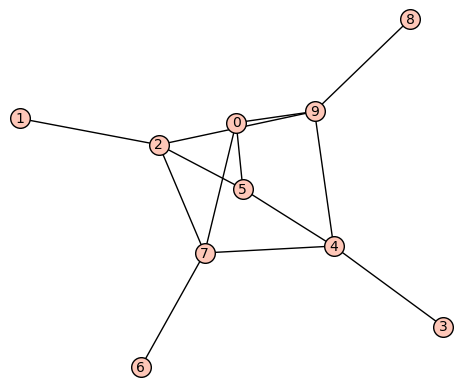

SUBGRAPHS:
ECr_


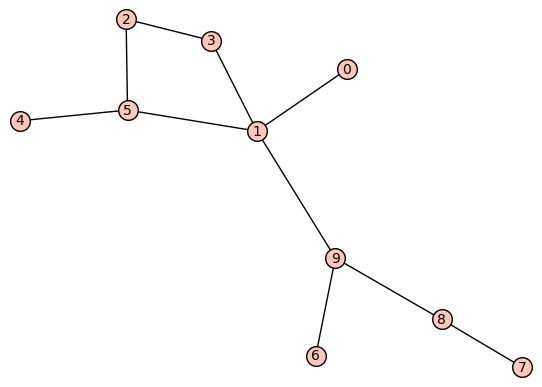

ECqg


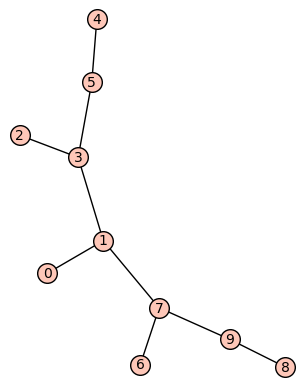

ECZG


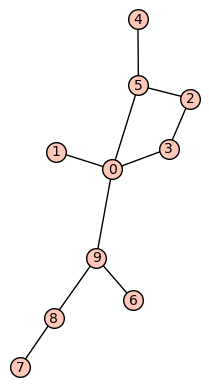

In [14]:
for key, value in subgraphs.items():
    g, i, t = key
    print("GRAPH: ", g)
    inverse_of_tree(Graph(t)).plot().show()
    print("SUBGRAPHS:")
    for g2, i2, t2 in value:
        print(g2)
        inverse_of_tree(Graph(t2)).plot().show()

ECRw


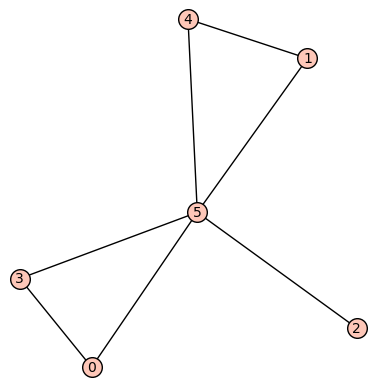

ECr_


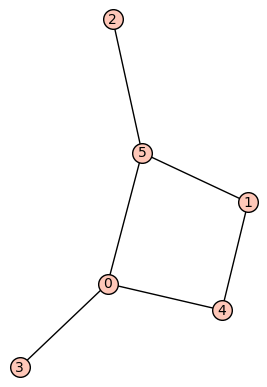

ECpo


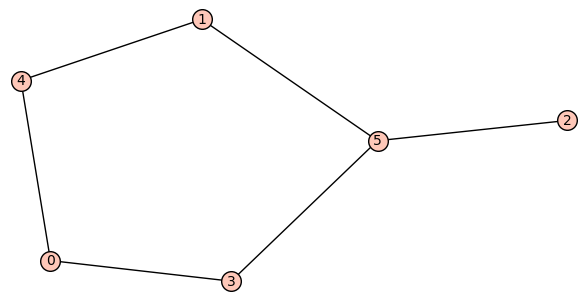

ECqg


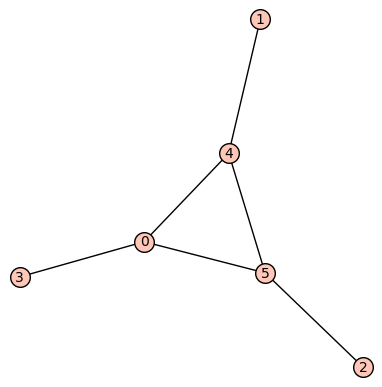

ECZG


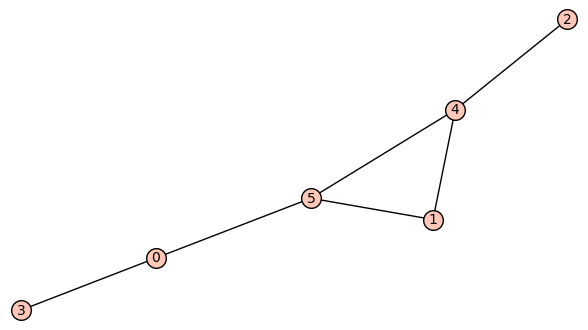

EQjO


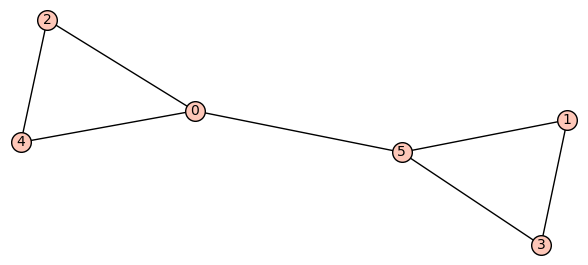

In [15]:
for g, i, t in bucket[9]:
    print(g)
    Graph(g).plot().show()

#### All inverses path-trees on 10 vertices are connected by some subgraph relation, the two maximal elements are the inverses of path-trees of:

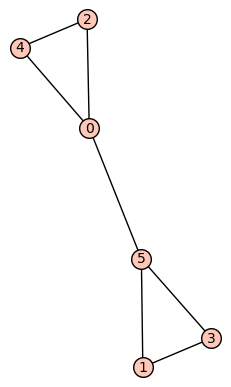

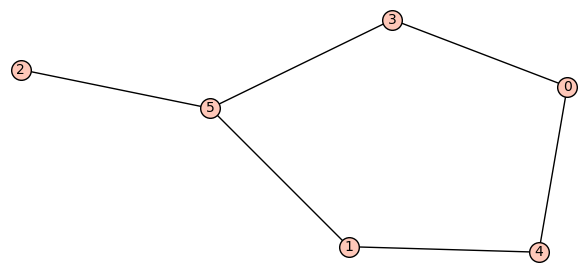

In [16]:
Graph("EQjO").plot().show()
Graph("ECpo").plot().show()

#### There are graphs with the same path-trees

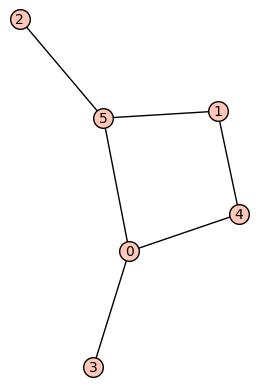

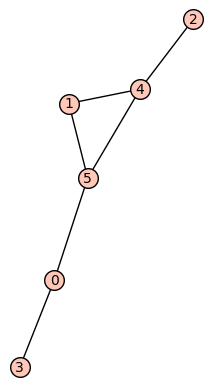

In [17]:
Graph("ECr_").plot().show()
Graph("ECZG").plot().show()


### Question Is Mu_mid(G1) > Mu_mid(G2)?

In [25]:
def get_max_eigv(G):
    return max(G.charpoly().real_roots())

def get_mid_eigv(G):
    mid_eig = 1e9
    for e in G.charpoly().real_roots():
        if e > 0  and e < mid_eig:
            mid_eig = e
    return mid_eig

def get_mid_matching(G):
    mid_eig = 1e9
    for e in G.matching_polynomial().real_roots():
        if e > 0  and e < mid_eig:
            mid_eig = e
    return mid_eig

In [26]:
def make_bucket(list_of_graphs : list):
    bucket = {}
    for g, i, t in list_of_graphs:
        sz : int = Graph(t).order()
        if sz not in bucket.keys():
            bucket[sz] = []
        bucket[sz].append((g, i, t))
    return bucket
    
def make_subgraph_relation(same_order_graphs : list):
    subgraphs = {}

    for g, i, t in same_order_graphs:
        T1_inv = inverse_of_tree(Graph(t))
        subgraphs[(g, i, t)] = []
        for g2, i2, t2 in bucket[9]:
            if g == g2:
                continue

            T2_inv = inverse_of_tree(Graph(t2))
            if T1_inv.subgraph_search_count(T2_inv) != 0:
                subgraphs[(g, i, t)].append((g2, i2, t2))
    return subgraphs
    
def test_conjecture(list_of_graphs : list):
    bucket : map = make_bucket(list_of_graphs)
        
    for size in bucket.keys():
        print("Testing for size: ", size)
        subgraphs = make_subgraph_relation(bucket[size])    
        
        for key, value in subgraphs.items():
            g, i, t = key
            print("GRAPH: ", g)
            G1 = Graph(g)
            T1 = Graph(t)
            T1_inv = inverse_of_tree(T1)

            for g2, i2, t2 in value:
                G2 = Graph(g2)
                T2 = Graph(t2)
                T2_inv = inverse_of_tree(T2)

                assert get_max_eigv(T1_inv) >= get_max_eigv(T2_inv)
                assert get_mid_eigv(T1) <= get_mid_eigv(T2)
                
                if not get_mid_matching(G1) <= get_mid_matching(G2):
                    print("CONJECTURE FAILED :C")
                    print(g)
                    G1.plot().show()
                    print(g2)
                    G2.plot().show()


In [57]:
def load_path_trees():
    list_of_graphs = []
    with open ('invertible_pathtrees.txt', 'r') as file:
        for line in file:
            data_list = line.strip().split(',')
            g, i, t = data_list
            list_of_graphs.append((g, int(i), t))
    return list_of_graphs

In [59]:
list_of_graphs = load_path_trees()
test_conjecture(list_of_graphs)

Testing for size:  6
GRAPH:  CV
Testing for size:  8
GRAPH:  ECRo
GRAPH:  ECZO
Testing for size:  10
GRAPH:  ECRw
GRAPH:  ECr_
GRAPH:  ECpo
GRAPH:  ECqg
GRAPH:  ECZG
GRAPH:  EQjO
GRAPH:  G?`@Fo
GRAPH:  G?`DEg
GRAPH:  G?`DBg
GRAPH:  G?`@fO
GRAPH:  G?`DbG
GRAPH:  G?`aeO
GRAPH:  G?`adO
Testing for size:  14
GRAPH:  ECro
GRAPH:  ECrg
GRAPH:  ECZW
GRAPH:  G?`@F{
GRAPH:  G?`DF_
GRAPH:  G?`DEc
GRAPH:  G?`DFg
GRAPH:  G?`DEw
GRAPH:  G?`DBw
GRAPH:  G?`DEk
GRAPH:  G?`@fC
GRAPH:  G?`FE_
GRAPH:  G?`F?w
GRAPH:  G?`DbO
GRAPH:  G?bBE_
GRAPH:  G?bBE_
GRAPH:  G?bBD_
GRAPH:  G?bB@o
GRAPH:  G?bBCc
GRAPH:  G?bBCc
GRAPH:  G?b@f?
GRAPH:  G?b@dG
GRAPH:  G?b@dC
GRAPH:  G?b@bC
GRAPH:  G?`aeG
GRAPH:  G?`acg
GRAPH:  GCOcfW
GRAPH:  GCQRF?
GRAPH:  GCQREO
GRAPH:  GCQRDO
GRAPH:  GCQREC
Testing for size:  18
GRAPH:  ECrw
GRAPH:  G?`DFg
GRAPH:  G?`DEk
GRAPH:  G?`DFw
GRAPH:  G?`DFk
GRAPH:  G?`@fS
GRAPH:  G?`DfG
GRAPH:  G?`DfG
GRAPH:  G?`DbW
GRAPH:  G?`DUg
GRAPH:  G?`DRk
GRAPH:  G?`aeW
GRAPH:  G?`acw
GRAPH:  G?`ePg
GRAPH

## Conjecture seems right!

### Question: Let G be a graph and H formed by G after removing a pendant and subdviding the neighbour, Is the IPT of G a subgraph of IPT of H? 

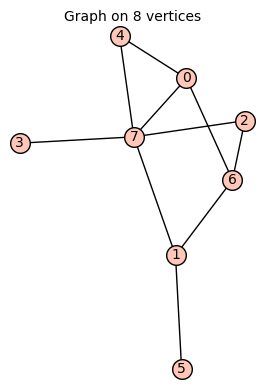

In [60]:
Graph("G?`FFo")

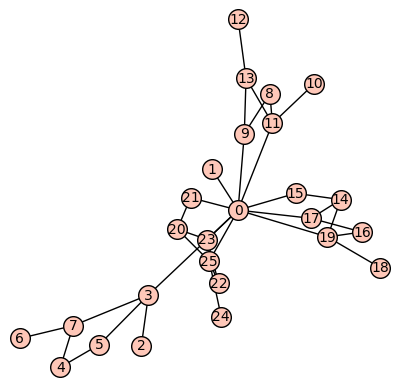

In [82]:
T1 = inverse_of_tree(PathTree(Graph("G?bBFo"), 3))
T1.plot().show()

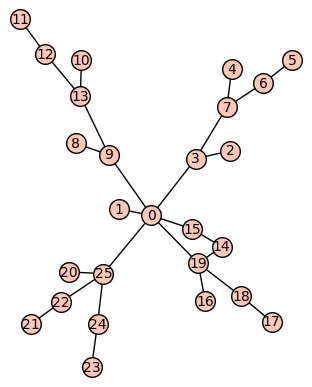

In [78]:
T2 = inverse_of_tree(PathTree(Graph("G?`FEs"), 3))
T2.plot().show()

In [83]:
T2.subgraph_search_count(T1)

0

In [84]:
T1.subgraph_search_count(T2)

160

In [91]:
Graph("G?bBFo").matching_polynomial().real_roots()

[-2.56025019682429,
 -1.58236986867625,
 -0.933432463323275,
 -0.264439718614563,
 0.264439718614563,
 0.933432463323275,
 1.58236986867625,
 2.56025019682429]

In [92]:
Graph("G?`FEs").matching_polynomial().real_roots()

[-2.66962781556064,
 -1.48770473953299,
 -0.736945570534164,
 -0.341662348563701,
 0.341662348563701,
 0.736945570534164,
 1.48770473953299,
 2.66962781556064]

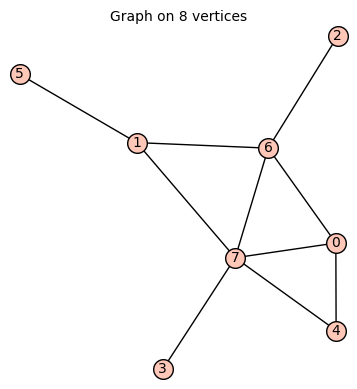

In [93]:
Graph("G?`FEs")

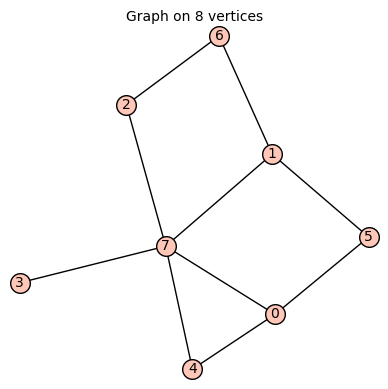

In [94]:
Graph("G?bBFo")

### Question: How does the mid root of the matching polynomial relates to the mid eigenvalue of the pathtree?